In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math


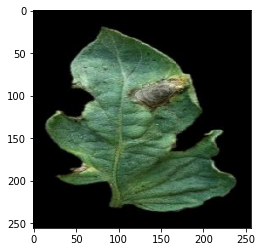

In [2]:

l1=cv2.cvtColor(cv2.imread('EB1.jpg'),cv2.COLOR_BGR2RGB)
rows,col,channels=l1.shape
plt.imshow(l1)

In [ ]:
l1c=l1.copy().reshape(rows*col,channels)
xyzArr=[]

for index,pixel in enumerate(l1c):
    sR,sG,sB=pixel
    r = ( sR / 255 )
    g = ( sG / 255 )
    b = ( sB / 255 )

    if r > 0.04045:
        r = ( ( r + 0.055 ) / 1.055 )** 2.4
    else:                   
        r = r / 12.92
        
    if g > 0.04045:
        g=( ( g + 0.055 ) / 1.055 )**2.4
        
    else:                   
        g = g / 12.92
        
    if b > 0.04045: 
        b = ( ( b + 0.055 ) / 1.055 )** 2.4
    else:
        b = b / 12.92

    r = r * 100
    g = g * 100
    b = b * 100

    x = r * 0.4124 + g * 0.3576 + b * 0.1805
    y = r * 0.2126 + g * 0.7152 + b * 0.0722
    z = r * 0.0193 + g * 0.1192 + b * 0.9505
    xyzArr.append([x,y,z])
xyzArr=np.array(xyzArr)

In [ ]:
labArr=[]
for value in xyzArr:
    x,y,z=value
    refX=94.811
    refY=100.000
    refZ=107.304

    x = x / refX
    y = y / refY
    z = z / refZ

    if x > 0.008856 :
            x = x ** ( 1/3 )
            
    else:                    
        x = ( 7.787 * x ) + ( 16 / 116 )
        
    if y > 0.008856 : 
        y = y ** ( 1/3 )
        
    else:
        y = ( 7.787 * y ) + ( 16 / 116 )
        
    if  z > 0.008856:
        z = z**( 1/3 )
        
    else:
        z = ( 7.787 * z ) + ( 16 / 116 )
        

    ciel = (( 116 * x ) - 16)*255/100
    ciea = (500 * ( x - y ))+128
    cieb = (200 * ( y - z ))+128
    labArr.append([ciel,ciea,cieb])
    
labArr=np.array(labArr).reshape(rows,col,channels)


<h2>L Channel</h2>

In [ ]:
l1c=cv2.cvtColor(l1,cv2.COLOR_RGB2Lab)
lchannel=l1c[:,:,0]
plt.imshow(lchannel,cmap='gray')

<h2>Plotting the histogram</h2>

In [ ]:
#improving the contrast of the image
rows,cols=lchannel.shape
lchannel=lchannel.reshape(rows*cols)
minP,maxP=np.amin(lchannel),np.amax(lchannel)

#min-max contrast enhancement
for index,pixel in enumerate(lchannel):
    lchannel[index]=(((pixel-minP)/(maxP-minP)))*255
    if pixel==0:
        lchannel[index]=255
lchannel=lchannel.reshape(rows,cols)
plt.imshow(lchannel,cmap='gray')

totalLeafPix=0
#calculating total leaf area
for inde,pixel in enumerate(lchannel.flatten()):
    if pixel==255:
        continue
    totalLeafPix+=1

In [ ]:
histo,bins,_=plt.hist(lchannel.flat,bins=100,range=(0,100),ec='red')
plt.show()

<h2>Finding the global Maxima</h2>

In [ ]:
#histogram peak
maxHisto=np.amax(histo)
#starting index of the bin
maxBin=bins[np.where(histo==maxHisto)][0]
print('Bin is {}'.format(maxBin))
if maxBin<=40:
    maxVal=0.2*maxHisto
else:
    maxVal=0.5*maxHisto
print(maxVal)

#calculating R
import math
maxi=-math.inf
maxV=-math.inf
for index,ele in enumerate(histo):
    if ele >maxVal and ele !=maxHisto and ele>maxV:
        maxi=bins[index]
        maxV=ele
      
r=maxi
if r==(-math.inf):
    r=maxBin
print(r)
#calculating s
s=2*r/3
threshold=s
print(s)
print(threshold)

(256, 256)


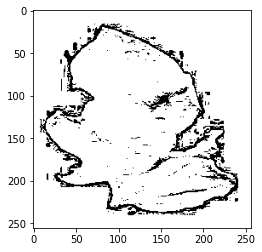

In [10]:
print(lchannel.shape)
rows,cols=lchannel.shape
lchannel=lchannel.reshape(rows*cols)

for index,pixel in enumerate(lchannel):
    if pixel<threshold:
        lchannel[index]=0
    else:
        lchannel[index]=255
lchannel=lchannel.reshape(rows,cols)
plt.imshow(lchannel,cmap='gray')


<h2>Quantification</h2>


In [11]:
count=0
for index,ele in enumerate(lchannel.flatten()):
    if ele==0:
        count+=1
print('Diseased Pixel Count : {}\n\n'.format(count))
print('Total Pixel Count : {}\n\n'.format(totalLeafPix))

percentage=(count/totalLeafPix)*100

print('Percentage of leaf disease : {}\n\n'.format(percentage))


    


Diseased Pixel Count : 5840


Total Pixel Count : 32770


Percentage of leaf disease : 17.82117790662191


